# Kasus - Klasifikasi Tulisan Tangan dengan Dataset MNIST

## Deskripsi Umum
Anda diminta untuk melakukan klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM untuk merekognisi tulisan tangan dari dataset MNIST

## Tentang Dataset MNIST

Dataset MNIST (Modified National Institute of Standards and Technology) merupakan dataset berupa citra grayscale dengan ukuran 28x28 yang berisi tulisan tangan dari digit angka 0-9. Jumlah data dalam dataset ini adalah 70.000 data.

## Detail Kuis

1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.

3. Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk
    - Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
    - Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.

4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

4. Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.
   - Anda diperbolehkan untuk melakukan tunning parameter.
   - Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.

5. Evaluasi model yang Anda buat terhadap data training dan data testing.
   - Gunakan metric *accuracy* untuk mengetahui tingkat akurasi data training dan data testing.
   - Gunakan fungsi *classification_report* untuk mengetahui performa model secara holistik.
   - Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.

6. Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.

7. Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan!

## Helper

Berikut merupakan kode bantuan untuk proses mengunduh dataset MNIST

In [1]:
# Unduh Dataset MNIST
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', as_frame=False, return_X_y=True)

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


## Library

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

In [3]:
scaler = MinMaxScaler()
X = np.array(X)
y = y.astype(int)

# Scaler
X = scaler.fit_transform(X)

## Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

In [4]:
class_distribution = np.bincount(y)

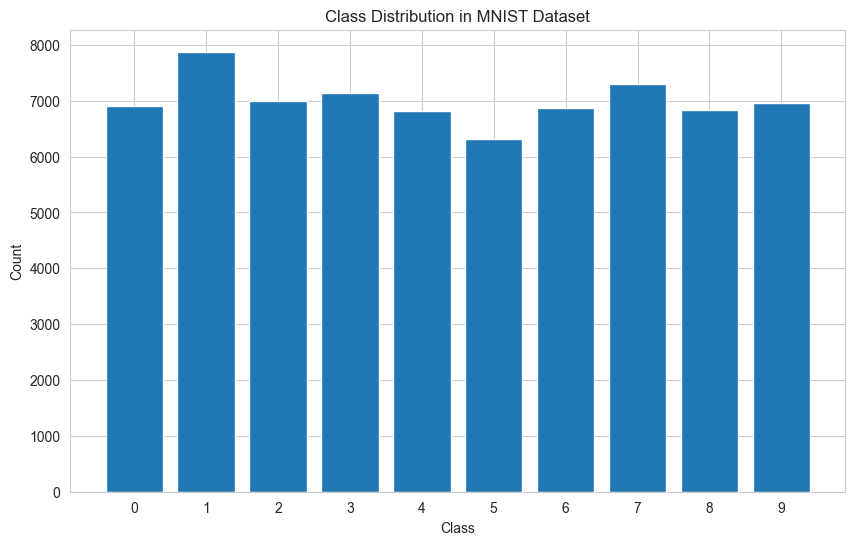

In [5]:
plt.figure(figsize=(10, 6))
plt.bar(range(10), class_distribution, tick_label=range(10))
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution in MNIST Dataset')
plt.show()

### Perhitungan Ketidakseimbangan Data

Data yang tidak seimbang dapat dihitung menggunakan rumus koefisien variasi (CV) menggunakan rumus

CV = s / x

Perhitungan koefisien variasi bisa kita lihat dari standard deviasi yang dibagi dengan rata-rata data, ini untuk melihat distribusi data tersebut

In [6]:
s = np.std(class_distribution)
x = np.mean(class_distribution)

cv = (s/x) * 100
print(f"{cv}%")

5.41177476641896%


Terlihat bahwa koefisien variasi adalah **5%**, ini menunjukkan bahwa distribusi variasi dari angka termasuk sangat kecil

## Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya.

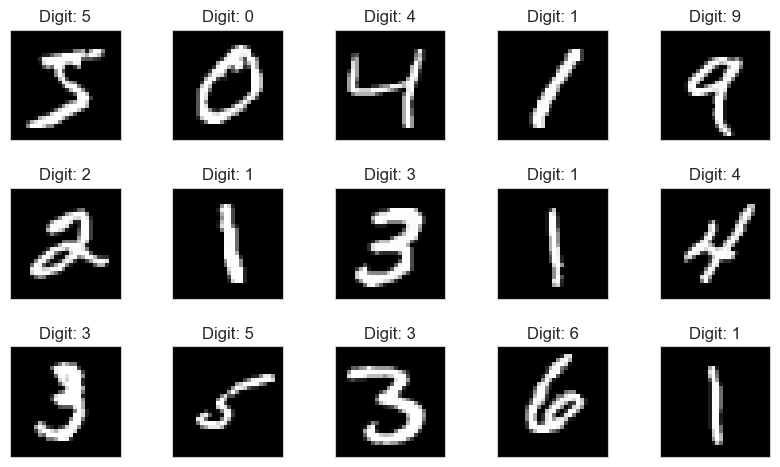

In [7]:
fig = plt.figure(figsize=(8,8))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.tight_layout()
    plt.imshow(X[i].reshape(28, 28), cmap = 'gray', interpolation=None)
    plt.title("Digit: {}".format(y[i]))
    plt.xticks([])
    plt.yticks([]) 

## Lakukan proses ekstraksi fitur pada data MNIST.

Pada proses ini, Anda diperbolehkan untuk langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.

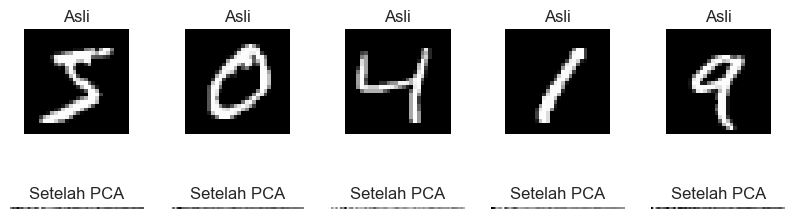

In [8]:
n = 60
pca = PCA(n_components = n)
X_pca = pca.fit_transform(X)
fig, axes = plt.subplots(2, 5, figsize=(10, 3))

for i in range(5):
    axes[0, i].imshow(X[i].reshape(28, 28), cmap=plt.cm.gray)
    axes[0, i].set_title("Asli")
    axes[0, i].axis('off')

    axes[1, i].imshow(X_pca[i].reshape(-1, n), cmap=plt.cm.gray)
    axes[1, i].set_title("Setelah PCA")
    axes[1, i].axis('off')

plt.show()

## Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

In [9]:
X_train_30, X_test_30, y_train_30, y_test_30 = train_test_split(X_pca, y, test_size=0.3, stratify=y)
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(X_pca, y, test_size=0.2, stratify=y)
X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(X_pca, y, test_size=0.1, stratify=y)

## Classification

In [27]:
def plot_image_with_prediction(image, true_label, predicted_label):
    plt.imshow(image.reshape(28, 28), cmap='gray', interpolation=None)
    title_color = 'black' if true_label == predicted_label else 'red'
    plt.title("True: {} | Predicted: {}".format(true_label, predicted_label), color=title_color)
    plt.xticks([])
    plt.yticks([])

In [11]:
from sklearn.model_selection import GridSearchCV
model = SVC()
param_grid = {'C': [1],
              'gamma': [0.001]}
grid = GridSearchCV(model, param_grid)
grid.fit(X_train_30, y_train_30)

GridSearchCV(estimator=SVC(), param_grid={'C': [1], 'gamma': [0.001]})

In [13]:
model = grid.best_estimator_
y_pred = model.predict(X_test_30)

In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_test_30, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2071
           1       0.94      0.98      0.96      2363
           2       0.93      0.92      0.92      2097
           3       0.91      0.91      0.91      2142
           4       0.91      0.94      0.93      2047
           5       0.89      0.90      0.90      1894
           6       0.95      0.96      0.95      2063
           7       0.94      0.93      0.94      2188
           8       0.93      0.89      0.91      2048
           9       0.92      0.89      0.91      2087

    accuracy                           0.93     21000
   macro avg       0.93      0.93      0.93     21000
weighted avg       0.93      0.93      0.93     21000


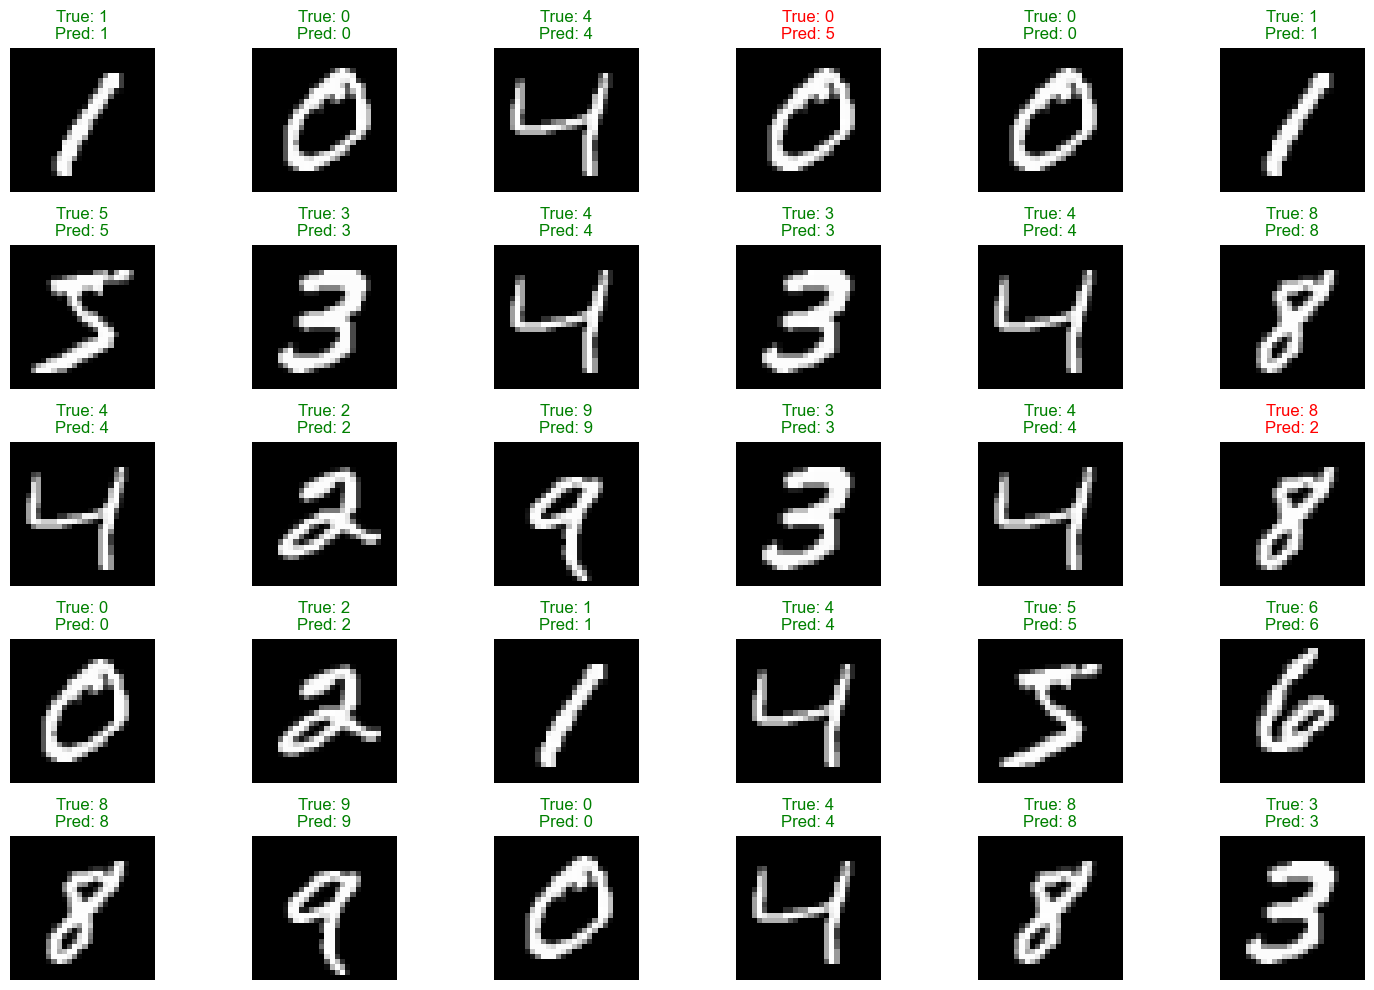

In [38]:
plt.figure(figsize=(15, 10))
for i in range(30): 
    plt.subplot(5, 6, i + 1) 
    index = np.random.randint(0, len(X_test_30)) 
    pred_label = y_pred[index]
    true_label = y_test_30[index]
    
    original_image = X[np.where(y == true_label)[0][0]].reshape(28, 28)
    plt.imshow(original_image, cmap='gray')
    plt.title(f'True: {true_label}\nPred: {pred_label}', color='g' if pred_label == true_label else 'r')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test_30, y_pred)

In [41]:
cm

array([[2018,    0,    3,    6,    6,   14,   13,    3,    8,    0],
       [   0, 2315,   13,    9,    1,    6,    1,    2,   14,    2],
       [  13,    6, 1924,   20,   42,    4,   33,   21,   30,    4],
       [   0,   13,   38, 1948,    1,   68,    4,   29,   29,   12],
       [   6,    6,   15,    0, 1928,    4,   14,    4,    4,   66],
       [  20,   24,   10,   68,   12, 1706,   31,    1,   19,    3],
       [   8,    9,   17,    0,   13,   24, 1985,    0,    7,    0],
       [   3,   21,   26,    6,   30,    4,    0, 2040,    8,   50],
       [  17,   43,   19,   39,   15,   58,   14,    8, 1813,   22],
       [   8,   14,    7,   36,   67,   19,    2,   57,   14, 1863]],
      dtype=int64)

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()